# Gradient filters

In [41]:
# Import
import cv2
import numpy as np
import imutils
import matplotlib.pyplot as plt
import matplotlib.cm as cm

## Roberts Filter
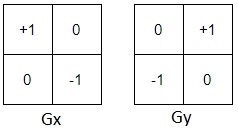

## Prewitt Filter
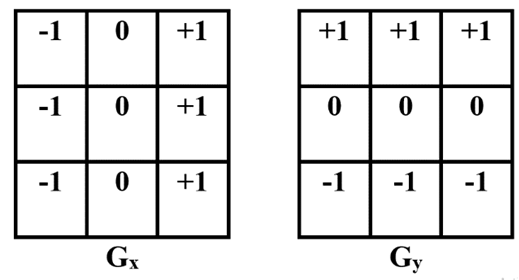

## Sobel Filter
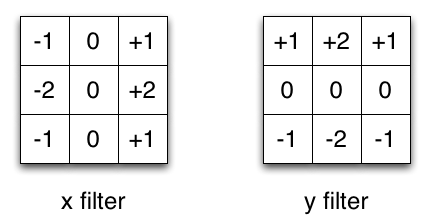

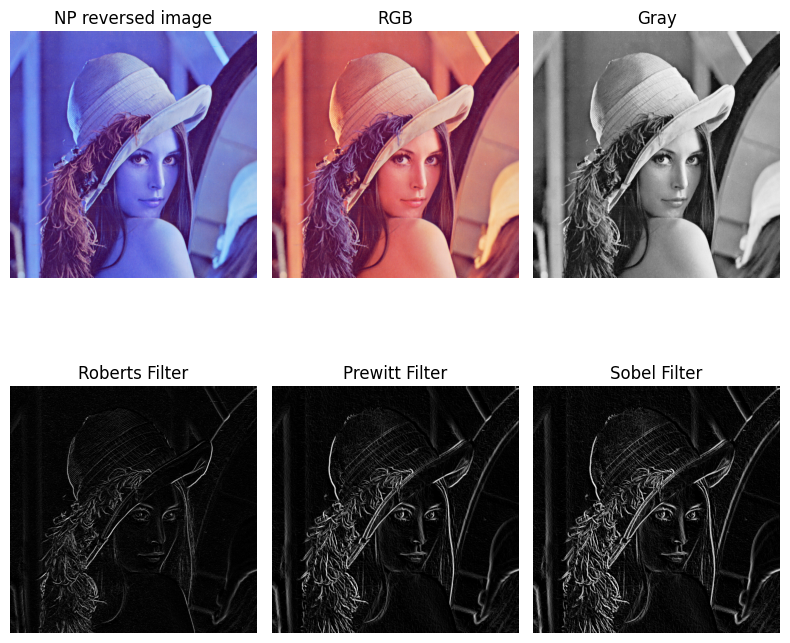

In [65]:
# Define remote url with image and download it into memory
img_url='https://eeweb.engineering.nyu.edu/~yao/EL5123/image/lena_color.tiff'
local_img=imutils.url_to_image(img_url)

#OpenCV represents RGB images as multi-dimensional NumPy arrays…but in reverse order!
#This means that images are actually represented in BGR order rather than RGB!
#There’s an easy fix though.

revert_np_image=cv2.cvtColor(local_img, cv2.COLOR_BGR2RGB)

#Converting image to grayscale
gray_img = cv2.cvtColor(revert_np_image,cv2.COLOR_BGR2GRAY)


#Creating Roberts Filter
kernelx = np.array([[1,0],[0,-1]])
kernely = np.array([[0,1],[-1,0]])

#Applying filter to the image in both x and y direction
img_robertsx = cv2.filter2D(gray_img, -1, kernelx)
img_robertsy = cv2.filter2D(gray_img, -1, kernely)

# Taking root of squared sum(np.hypot) from both the direction and displaying the result
roberts = np.hypot(img_robertsy,img_robertsx)
roberts = roberts.astype('int')


#Creating Prewitt filter
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

#Applying filter to the image in both x and y direction
img_prewittx = cv2.filter2D(gray_img, -1, kernelx)
img_prewitty = cv2.filter2D(gray_img, -1, kernely)

# Taking root of squared sum(np.hypot) from both the direction and displaying the result
prewitt = np.hypot(img_prewitty,img_prewittx)
prewitt = prewitt.astype('int')


#Creating Sobel filter
kernelx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
kernely = np.array([[1, 2, 1],[0, 0, 0],[-1,-2,-1]])

#Applying filter to the image in both x and y direction
img_sobelx = cv2.filter2D(gray_img, -1, kernelx)
img_sobely = cv2.filter2D(gray_img, -1, kernely)

#taking root of squared sum and displaying result
sobel=np.hypot(img_sobelx,img_sobely)
sobel = sobel.astype('int')


# Plot
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(8, 8), tight_layout=True)
axs[0, 0].imshow(local_img, cmap=cm.Greys_r)
axs[0, 0].set_title("NP reversed %s" % "image")
axs[0, 0].axis("off")

axs[0, 1].imshow(revert_np_image, cmap=cm.Greys_r)
axs[0, 1].set_title("RGB")
axs[0, 1].axis("off")

axs[0, 2].imshow(gray_img, cmap=cm.Greys_r)
axs[0, 2].set_title("Gray")
axs[0, 2].axis("off")

axs[1, 0].imshow(roberts, cmap=cm.Greys_r)
axs[1, 0].set_title("Roberts Filter")
axs[1, 0].axis("off")

axs[1, 1].imshow(prewitt, cmap=cm.Greys_r)
axs[1, 1].set_title("Prewitt Filter")
axs[1, 1].axis("off")

axs[1, 2].imshow(sobel, cmap=cm.Greys_r)
axs[1, 2].set_title("Sobel Filter")
axs[1, 2].axis("off")

plt.show()
